    Entity Code        Day  p_proj_all_ages
0  Albania  ALB 2020-01-31           -10.16
1  Albania  ALB 2020-02-29             2.88
2  Albania  ALB 2020-03-31             1.31
3  Albania  ALB 2020-04-30             4.04
4  Albania  ALB 2020-05-31             7.00
       p_proj_all_ages
count     12636.000000
mean         11.112179
std          24.942211
min         -95.920000
25%          -1.622500
50%           5.620000
75%          15.980000
max         377.630000
Entity             0
Code               0
Day                0
p_proj_all_ages    0
dtype: int64


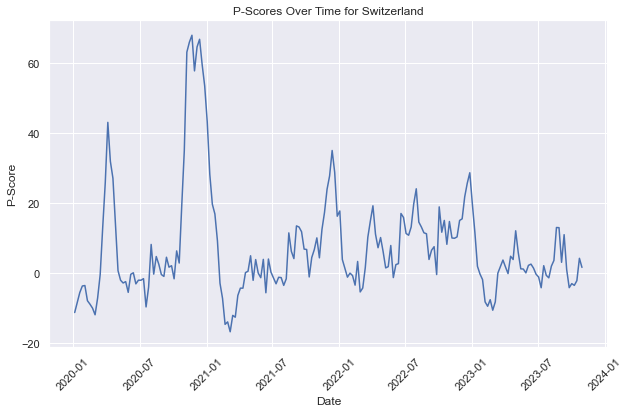

Mean Squared Error: 168.64039912133364


/var/folders/fy/7mfyb97n7q12tbfy_b8cwnwr0000gn/T/ipykernel_2087/3864189048.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Day_numeric'] = (filtered_data['Day'] - filtered_data['Day'].min()).dt.days


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'data/excess-mortality-p-scores-projected-baseline.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'Day' to datetime
data['Day'] = pd.to_datetime(data['Day'])

# Basic Information and Statistical Overview
print(data.head())
print(data.describe())
print(data.isnull().sum())

# Visualization for Switzerland
specific_country = 'Switzerland'
filtered_data = data[data['Entity'] == specific_country]

sns.set()
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Day'], filtered_data['p_proj_all_ages'])
plt.title(f'P-Scores Over Time for {specific_country}')
plt.xlabel('Date')
plt.ylabel('P-Score')
plt.xticks(rotation=45)
plt.show()

# Predictive Analysis - Simple Linear Regression
# Convert 'Day' to a numeric value for regression
filtered_data['Day_numeric'] = (filtered_data['Day'] - filtered_data['Day'].min()).dt.days

# Preparing data for linear regression
X = filtered_data[['Day_numeric']]  # Predictor
y = filtered_data['p_proj_all_ages']  # Response

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
